In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

## Perform API Calls

In [36]:
weather = pd.DataFrame({"City": cities})
#weather["City"] = ""
weather["Cloudiness"] = ""
weather["Country"] = ""
weather["Date"] = ""
weather["Humidity"] = ""
weather["Lat"] = ""
weather["Lng"] = ""
weather["Max Temp"] = ""
weather["Wind Speed"] = ""

# OpenWeatherMap API Key
api_key = api_keys.api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

count = 1

print("Begin Data Retrieval")
print("----------------------------")
for index in range(len(cities)):
    weather_city = cities[index]
    weather_url = url + "&q=" + weather_city.replace(" ", "%20")
    
    if(index+1)%59==0:
        time.sleep(65)
    
    weather_response = requests.get(weather_url).json()
    #weather_json = weather_response.json()
    if weather_response["cod"] == "404":
        print("City not found. Skipping...")
        
    else:
        #print(weather_response)
        weather.set_value(index, "City", weather_city)
        weather.set_value(index, "Cloudiness", weather_response["clouds"]["all"])
        weather.set_value(index, "Country", weather_response["sys"]["country"])
        weather.set_value(index, "Date", weather_response["dt"])
        weather.set_value(index, "Humidity", weather_response["main"]["humidity"])
        weather.set_value(index, "Lat", weather_response["coord"]["lat"])
        weather.set_value(index, "Lng", weather_response["coord"]["lon"])
        weather.set_value(index, "Max Temp", weather_response["main"]["temp"])
        weather.set_value(index, "Wind Speed", weather_response["wind"]["speed"])
    
        print("Processing Record", count, "|", weather_city)
        print(weather_url)
      
    count += 1
        
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")


Begin Data Retrieval
----------------------------
Processing Record 1 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=nanortalik


/anaconda3/envs/Python/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/Python/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/Python/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/Python/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/Python/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessor

Processing Record 2 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=torbay
Processing Record 3 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=rio%20gallegos
Processing Record 4 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=georgetown
Processing Record 5 | havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=havoysund
Processing Record 6 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=bluff
Processing Record 7 | seminole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=seminole
Processing Record 8 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=kapaa

Processing Record 61 | dalmau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=dalmau
Processing Record 62 | panjab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=panjab
Processing Record 63 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=butaritari
Processing Record 64 | mahibadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=mahibadhoo
Processing Record 65 | wausau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=wausau
Processing Record 66 | aldan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=aldan
City not found. Skipping...
Processing Record 68 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0

Processing Record 122 | rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=rocha
Processing Record 123 | westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=westport
Processing Record 124 | kabirwala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=kabirwala
City not found. Skipping...
Processing Record 126 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=gat
City not found. Skipping...
City not found. Skipping...
Processing Record 129 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=narsaq
Processing Record 130 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=mar%20del%20plata
Processing Record 131 | lamont
http://api.openweat

Processing Record 189 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=saint-joseph
Processing Record 190 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=nhulunbuy
Processing Record 191 | mwense
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=mwense
Processing Record 192 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=souillac
City not found. Skipping...
Processing Record 194 | leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=leshukonskoye
Processing Record 195 | puerto baquerizo moreno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=puerto%20baquerizo%20moreno
Processing Record 196 | skibbereen
http://api.openwe

Processing Record 249 | ginda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=ginda
Processing Record 250 | pecos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=pecos
Processing Record 251 | marsa matruh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=marsa%20matruh
Processing Record 252 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=faanui
Processing Record 253 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=vila%20franca%20do%20campo
Processing Record 254 | port keats
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=port%20keats
Processing Record 255 | taree
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=98

Processing Record 309 | bastrop
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=bastrop
City not found. Skipping...
Processing Record 311 | birao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=birao
Processing Record 312 | nizhniy kuranakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=nizhniy%20kuranakh
Processing Record 313 | grand-lahou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=grand-lahou
Processing Record 314 | saint-francois
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=saint-francois
Processing Record 315 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=port%20hedland
Processing Record 316 | namibe
http://api.openweathermap.org/dat

Processing Record 369 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=aykhal
Processing Record 370 | aguimes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=aguimes
Processing Record 371 | auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=auki
Processing Record 372 | kamisu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=kamisu
Processing Record 373 | tonstad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=tonstad
Processing Record 374 | sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=sobolevo
Processing Record 375 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=okhotsk
Process

Processing Record 429 | jacmel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=jacmel
Processing Record 430 | oum hadjer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=oum%20hadjer
Processing Record 431 | honiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=honiara
Processing Record 432 | new iberia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=new%20iberia
Processing Record 433 | bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=bilma
Processing Record 434 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=vanimo
City not found. Skipping...
Processing Record 436 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837

Processing Record 490 | claresholm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=claresholm
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 494 | tevaitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=tevaitoa
Processing Record 495 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=yar-sale
Processing Record 496 | maracaju
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=maracaju
Processing Record 497 | hervey bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=hervey%20bay
Processing Record 498 | harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=harper
City not found. Skipping...
Processing R

Processing Record 556 | sapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=sapa
City not found. Skipping...
Processing Record 558 | marienburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=marienburg
Processing Record 559 | opuwo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=opuwo
Processing Record 560 | maiduguri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=maiduguri
Processing Record 561 | bar harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=bar%20harbor
Processing Record 562 | brownsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9847837488e8324e6d0f8d66ee3563b9&q=brownsburg
Processing Record 563 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial

In [37]:
weather.count()

City          601
Cloudiness    601
Country       601
Date          601
Humidity      601
Lat           601
Lng           601
Max Temp      601
Wind Speed    601
dtype: int64

In [40]:
weather.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nanortalik,24,GL,1535239790,98,60.14,-45.24,39.89,4.52
1,torbay,5,CA,1535238000,64,47.66,-52.73,68,19.46
2,rio gallegos,90,AR,1535238000,86,-51.62,-69.22,41,2.24
3,georgetown,20,GY,1535238000,83,6.8,-58.16,80.6,6.93
4,havoysund,68,NO,1535237400,100,71,24.66,48.2,13.87


In [43]:
weather.to_csv('WeatherPyData.csv') 

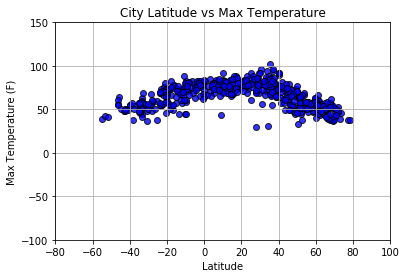

In [23]:
plt.scatter(weather["Lat"], weather["Max Temp"], marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.8, label = "City")
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80, 100)
plt.ylim(-100, 150)
plt.grid()
plt.savefig("weather_temperature.png")
plt.show()

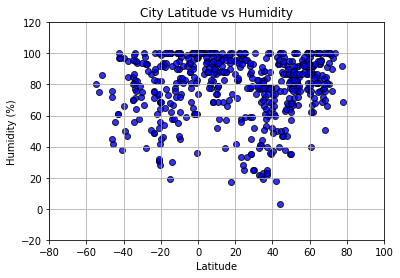

In [24]:
plt.scatter(weather["Lat"], weather["Humidity"], marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.8, label = "City")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.grid()
plt.savefig("weather_humidity.png")
plt.show()

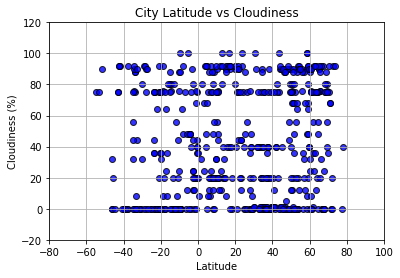

In [25]:
plt.scatter(weather["Lat"], weather["Cloudiness"], marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.8, label = "City")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.grid()
plt.savefig("weather_cloud.png")
plt.show()

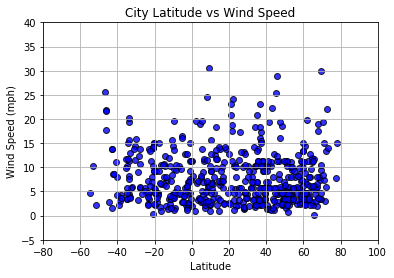

In [28]:
plt.scatter(weather["Lat"], weather["Wind Speed"], marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.8, label = "City")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80, 100)
plt.ylim(-5, 40)
plt.grid()
plt.savefig("weather_wind_speed.png")
plt.show()